# <font color='black'> Multidimensional Scaling Algorithm </font> 

## Intro

**Multidimensional scaling** is an algorithm used for dimensionality reduction and manifold learning. In some ways it was the earliest developed method, with broad applications for high dimensional data in genetics, psychology, sociology, political science, ecology, and many other domains related to modeling structural relationships between objects and conveying their similarities spatially [<sup>1</sup>](#fn1). <br>
<br>
Multidimensional scaling uses pairwise similarity measures (which can be similarity measures of any kind, even qualitative ratings of similarity) to construct a spatial representation to keep similar objects close together and dissimilar objects further apart. In this way, the goal is to capture the structure of the higher dimensional data in a lower dimensional representation.  

Here's a few examples from the social sciences:

![title](mds_psych.gif)
<font size =0.95>
The figure shows an application of multidimensional scaling in clinical psychology - the spatial representation illustrates dimensions of repetitive thought. The horizontal axis 'Valence' reflects whether the content of thoughts is positive or negative. The vertical axis 'Purpose' reflects whether the tone of thoughts is searching, questioning, and/or uncertain (negative numerical values) or largely solving, planning, and/or certain (positive numerical values). Notice that similar types are close together (self-analysis, reflection) and dissimilar types are further apart (reminiscing, worry) <br>
https://www.apa.org/science/about/psa/2011/03/repetitive-thought </font>

![title](mds_pol_new.png)

<font size =0.95> The following example shows Multidimensional scaling applied to voting patterns of Democratics/Republicans in US House of Representatives <font>

## Multidimensional Scaling in Python

To get a sense of how Multidimensional scaling works on datasets, we show some examples using the *sklearn.manifold package*. 

Given a dissimilarity matrix of pairwise similarity measures (distances in this case), Multidimensional scaling (MDS) attempts to find a configuration $X_1, ..., X_n \in \mathbb{R}^p$ in a specified dimension $p$ such that the pairwise distances are preserved.

## Import Libraries

In [83]:
# import libraries
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (5, 5)

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

# plotting style
#plt.style.use('classic')
#plt.style.use('dark_background')
#plt.style.use('bmh')

import seaborn as sns

from IPython.display import Image

# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";

import warnings
warnings.filterwarnings('ignore');

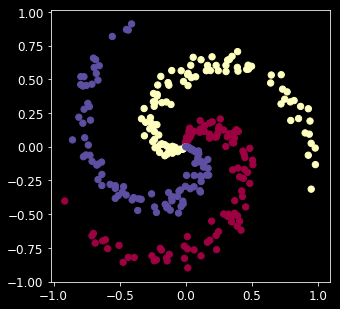

In [84]:
# spiral dataset from http://cs231n.github.io/neural-networks-case-study/
plt.style.use('dark_background')
from IPython.core.pylabtools import figsize
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show();

The structure of the data is more accurately represented as the pairwise distance matrix, since scaling, rotation, and translations don't necessarily change the structure of this dataset.

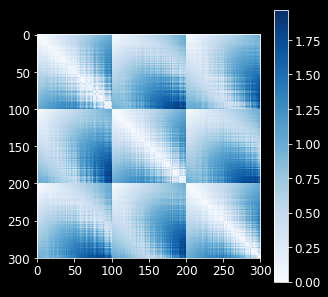

In [90]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
plt.imshow(D, cmap='Blues', interpolation='nearest')
plt.colorbar();

Notice the three bands corresponding to the three spirals or classes. Now we linearly project the data into 3 dimensions.

In [14]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(300, 3)

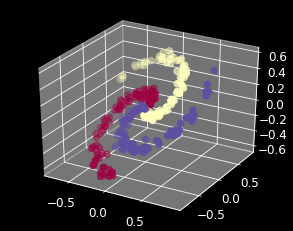

In [81]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2], c=y, s=40, cmap=plt.cm.Spectral);

MDS can map this 3D data into 2D in a way that nicely recovers the original 2D data

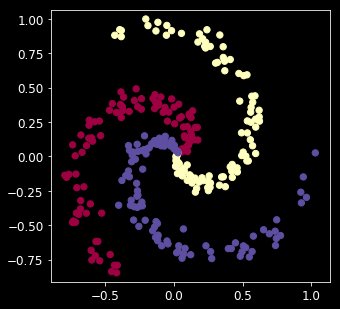

In [16]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.axis('equal');

The 2D transformation using MDS preserves the pairwise distances fairly well, shown by the following pairwise distance matrix.

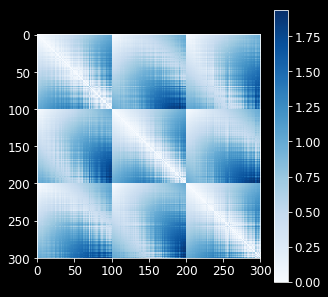

In [17]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(out3)
plt.imshow(D, cmap='Blues', interpolation='nearest')
plt.colorbar();

MDS isn't able to recover the data as well under a non-linear projection

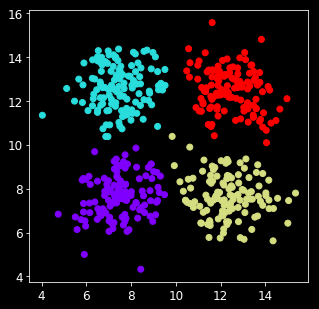

In [18]:
from sklearn.datasets import make_blobs
plt.style.use('dark_background')
x, y = make_blobs(n_samples=500, centers=[[7.5, 7.5], [7.5, 12.5], [12.5, 7.5], [12.5, 12.5]], cluster_std=1)
plt.scatter(x[:,0], x[:,1], c=y, cmap=plt.cm.rainbow);

We define a function that projects the data into 3D with the following 'swiss roll' transformation

In [19]:
def make_swiss_roll(X):
    x = X[:, 0]*np.cos(X[:, 0])
    y = X[:, 1]
    z = X[:, 0]*np.sin(X[:, 0])
    return np.vstack((x, y, z)).T

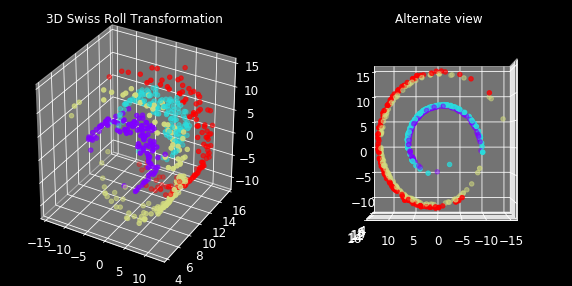

In [73]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], c=y, cmap=plt.cm.rainbow);
plt.title('3D Swiss Roll Transformation')

# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
plt.title('Alternate view')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], c=y, cmap=plt.cm.rainbow)
ax.view_init(0,90);

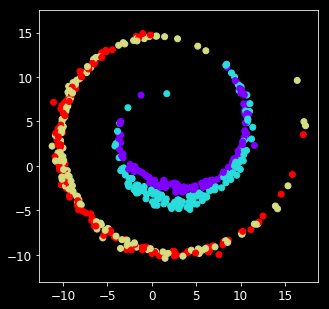

In [74]:
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], c=y, cmap=plt.cm.rainbow)
plt.axis('equal');

Here MDS merely flattens the data onto the yz-plane and isn't able to represent the original structure of our original clustered data. <br>
<br>
As we will see, MDS attempts to preserve global distances between all the pairs and this doesn't work as well for nonlinear embeddings. Local linear embedding works better by only considering linear relationships within small neighborhoods.

## <font color='blue'> The Algorithm </font>

**Algorithm Outline**: <br>
<br>
Given a pairwise distance matrix $D$ with entries $d_{ij}$ for the distance/dissimilarity between $X_i, X_j$, find $X_1, ..., X_n \in \mathbb{R}^p$ such that: <br>
<br>
$$d_{ij}^2 \approx ||X_{i} - X_{j}||^2$$
<br>
We find the configuration that keeps the Euclidean distance as close as possible to our original distances/similarities. <br>
<br>
**Note:** the original distances in $D$ do not have to be Euclidean distances. They can be pairwise dissimilarities, even for qualitative comparisons. The algorithm will be slightly modified when the original distances are Euclidean vs. non-Euclidean.

## <font color='blue'> Classical MDS </font>

When original distances are Euclidean, we use Classical Multidimensional Scaling and we try to find a configuration so that the configured distances are equal to our original dissimilarities: <br> <br>
$$d_{ij} = ||X_{i} - X_{j}||$$

**Input**: $D$, n x n matrix with *Euclidean* pairwise distances <br>
**Output**: $X = [X_1, ..., X_n]$, configuration with the coordinate positions of our observations <br>
<br>
**Steps**:
1. Compute the inner product matrix $B$ <br>
2. Find the output configuration $X$ from matrix $B$

### Step 1: Inner product matrix

The points that we output are defined as the rows of matrix $X = [X_1, ..., X_n]^T$,  where $X_1, ..., X_n \in \mathbb{R}^p$ <br>
<br>
**Important detail/constraint**: <br>
<br>
We have to account for a translational degree of freedom
***

If we solve for this $X$, then we also have solution $X^* = X + c$: <br>
<br>
$$
\begin{equation}
\begin{aligned}
d_{ij}^2 & = ||X^*_{i} - X^*_{j}||^2\\
\\
            & = ||(X_{i} + c) - (X_{j} + c)||^2\\
\\
            & = ||X_{i} - X_{j}||^2\\
\end{aligned}
\end{equation}
$$

Any shift of the points by an arbitrary value of c are all solutions, so we just assume points are centered around zero. <br>
Stated as the constraint that the mean of each column of $X$ (or the sums of each coordinate in $\mathbb{R}^p$) is zero:  <br>
$$\sum_{i=1}^n X_{ik} = 0, \ \ \text{for all k}$$

**Computing Gram Matrix B:** <br>
<br>
To find the matrix $X$ with the output coordinates, we use the n x n Gram matrix $B$ defined by the inner products. Remember we are only given the dissimilarity matrix with pairwise dissimilarities $d_{ij}$, so we have to use these to find $B$:

$$\underbrace{\mathbf{B}}_{n_{x} n} = \underbrace{\mathbf{X}}_{n_{x} p} \cdot \underbrace{\mathbf{X^T}}_{p_{x} n}$$ <br>

We have <br>
<br>
$$\mathbf{B} = \mathbf{X X^T} = \begin{bmatrix}
X_{1_1} & X_{1_2} & \cdots & X_{1_p} \\
X_{2_1} & X_{2_2} & \cdots & X_{2_p} \\
\vdots & \vdots & \vdots & \vdots \\
X_{n_1} & X_{n_2} & \cdots & X_{n_p}
\end{bmatrix} 
\begin{bmatrix}
X_{1_1} & X_{2_1} & \cdots & X_{n_1} \\
X_{1_2} & X_{2_2} & \cdots & X_{n_2} \\
\vdots & \vdots & \vdots & \vdots \\
X_{1_p} & X_{2_p} & \cdots & X_{n_p}
\end{bmatrix}$$ <br>
<br>

The entries of $B$ are given by $b_{ij} = \langle X_i , X_j \rangle = \sum_{k=1}^p X_{ik} X_{jk}$

and we relate this to distance $d_{ij}$: <br>
$$
\begin{equation}
\begin{aligned}
d_{ij}^2 & = ||X_i - X_j||^2\\
\\
            & = \sum_{k} (X_{ik} - X_{jk})^2\\
\\
            & = \sum_{k} X_{ik}^2 - 2 \sum_{k} X_{ik} X_{jk} + \sum_{k} X_{jk}^2\\
\\
            & = b_{ii} - 2 b_{ij} + b_{jj}\\
\end{aligned}
\end{equation}
$$

We're not quite there because we need an equation for $b_{ij}$ that only depends on the entries $d_{ij}$ (since we only have the pairwise distances as an input)

**"Double Centering"**: <br>
- - -
If we have column means of $X = 0$, then since B is symmetric the column means and row means of $B = 0$. The matrix B is "double centered". We first show how to derive this useful fact about $B$ by applying our constraint on the translational degree of freedom mentioned above.

From the previous constraint of centering $X$ around 0: <br>
<br>
$$\sum_{i=1}^n X_{ik} = 0, \ \ \text{for all k}$$
<br>
and so with $b_{ij} = \langle X_i , X_j \rangle = \sum_{k=1}^p X_{ik} X_{jk}$ we have column sums:
$$
\begin{equation}
\begin{aligned}
\sum_{i=1}^n b_{ij} & = \sum_{i=1}^n \sum_{k=1}^p X_{ik} X_{jk} \\
\\
            & = \sum_{k=1}^p X_{jk} \sum_{i=1}^n X_{ik} \\
\\
            & = 0 \ \ \ \text{for j = 1,...,n}\\
\end{aligned}
\end{equation}
$$

Hence, the sum of each column of $B = 0$. Since $B$ is symmetric, the row sums are also equal to zero.

Therefore from $d_{ij}^2 = b_{ii} + b_{jj} - 2 b_{ij}$ we have: <br>
<br>
$$
\begin{equation}
\begin{aligned}
1.) \ \sum_{i=1}^n d_{ij}^2 & = \sum_{i=1}^n b_{ii} + n b_{jj} - 2 \sum_{i=1}^n b_{ij} \\
\\
            & = tr(B) + n b_{jj} + 0 && (\text{by result of double centering around 0)}\\
\\
            & = tr(B) + n b_{jj}\\
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
2.) \ \sum_{j=1}^n d_{ij}^2 & = n b_{ii} + \sum_{j=1}^n b_{jj} - 2 \sum_{i=1}^n b_{ij} \\
\\
            & = tr(B) + n b_{ii} + 0 && (\text{by result of double centering around 0)}\\
\\
            & = tr(B) + n b_{ii}\\
\end{aligned}
\end{equation}
$$

$$
\begin{equation}
\begin{aligned}
3.) \ \sum_{j=1}^n \sum_{i=1}^n d_{ij}^2 & = \sum_{j=1}^n \sum_{i=1}^n b_{ii} + \sum_{i=1}^n \sum_{j=1}^n b_{jj} - 2 \sum_{j=1}^n \sum_{i=1}^n b_{ij} \\
\\
            & = n tr(B) + n tr(B) + 0 && (\text{by result of double centering around 0)}\\
\\
            & = 2n tr(B)\\
\end{aligned}
\end{equation}
$$

Rearranging the equalities above: <br>
<br>
$$1.) \ \ b_{ii} = \frac{1}{n}(\sum_{j=1}^n d_{ij}^2 - tr(B))$$

$$2.) \ \ b_{jj} = \frac{1}{n}(\sum_{i=1}^n d_{ij}^2 - tr(B))$$

$$3.) \ \ \frac{1}{n^{2}}\sum_{j=1}^n \sum_{i=1}^n d_{ij}^2 = \frac{2}{n}tr(B)$$

Finally, we combine these previous results to get the closed form of matrix $B$ in terms of dissimilarities $d_{ij}$ <br>
<br>
$$
\begin{equation}
\begin{aligned}
b_{ij} & = -\frac{1}{2} (d_{ij}^2 - b_{ii} - b_{jj}) \\
\\
            & = -\frac{1}{2} [d_{ij}^2 - \frac{1}{n}(\sum_{j=1}^n d_{ij}^2 - tr(B)) - \frac{1}{n}(\sum_{i=1}^n d_{ij}^2 - tr(B))]\\
\\
            & = -\frac{1}{2} [d_{ij}^2 - \frac{1}{n} \sum_{j=1}^n d_{ij}^2 - \frac{1}{n} \sum_{i=1}^n d_{ij}^2 + \frac{2}{n}tr(B)] \\
\\
            & = -\frac{1}{2} [d_{ij}^2 - \frac{1}{n} \sum_{j=1}^n d_{ij}^2 - \frac{1}{n} \sum_{i=1}^n d_{ij}^2 + \frac{1}{n^{2}}\sum_{j=1}^n \sum_{i=1}^n d_{ij}^2] \\
\end{aligned}
\end{equation}
$$

Where: <br>
<br>
$\frac{1}{n} \sum_{j=1}^n d_{ij}^2$ represents the row mean <br>
<br>
$\frac{1}{n} \sum_{i=1}^n d_{ij}^2$ represents the column mean <br>
<br>
$\frac{1}{n^{2}} \sum_{j=1}^n \sum_{i=1}^n d_{ij}^2$ is the overall sample mean
<br>

**Closed Form with Centering Matrix:** <br>
<br>
That derivation is somewhat lengthy, but illustrates how this closed form for matrix $B$ can be found in a more natural way that starts from the constraint of centering around 0 to remove the translational degree of freedom. <br>
<br>
We can now state the closed form of $B$ more succinctly by making use of the **Centering Matrix** - $C_{n}$ <br>

$$\boxed {B = \frac{-1}{2} C_n D_{2} C_{n}^T}$$ <br>
<br>
**Note:** <br>

$C_{n}$ = Centering matrix, $D_2$ = matrix with entries ${d_{ij}^2}$ <br>
<br>
$C_{n} = I_{n} - \frac{1}{n} \mathbf{1}\mathbf{1^T}$ <br>
<br>
where $I_{n}$ is the Identity matrix, $\mathbf{1}$ is a column vector of n ones <br>
<br>
$C_{n} X C_{n}^T$ removes the column and row mean from every element of X

Ex.) $$C_{2} = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} - \frac{1}{2} \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix} = \begin{bmatrix}
1/2 & -1/2 \\
-1/2 & 1/2
\end{bmatrix} $$

### Step 2: Find coordinate positions of lower dimensional configuration

We can now use the eigendecomposition of B: <br>
$$B = X X^T = V \Lambda V^T$$ <br>
using the fact that $B$ is symmetric, positive definite n x n matrix
and so <br>
$$ \boxed{X = \Lambda^\frac{1}{2} V^T}$$ 

We can reduce the dimensionality to $q \leq p$: <br>
$$ \boxed{X_{q} = \Lambda_{q}^\frac{1}{2} V_{q}^T}$$

by choosing the first q columns of V where $\Lambda_{q}$ is the first q x q submatrix

## <font color='blue'> Metric vs. Non-metric MDS </font>
<font color='black'> ------------------------------------------------------------------ </font>

**Metric MDS** - dissimilarities are quantitative (such as distances, classical MDS is a special case) <br>
**Non-metric MDS** - dissimilarities are qualitative (similarity measures are interpreted more as rankings or ordinal classifications) <br>

### Metric MDS

For Classical Multidimensional Scaling we found $X_1, ..., X_n \in \mathbb{R}^p$ such that: <br>
<br>
$$d_{ij} \approx ||X_{i} - X_{j}||$$
<br>
in order to keep the Euclidean distances in our configuration as close as possible to our original distances/similarities.

In the general Metric MDS case, given a monotonic function $f$ and a lower dimension $p$, find the optimal configuration $X_1, ..., X_n \in \mathbb{R}^p$ such that: <br>
<br>
$$f(d_{ij}) \approx \hat{d_{ij}} = ||X_{i} - X_{j}||$$

**Note**: For classical MDS, we just have the case where $f(d_{ij}) = \hat{d_{ij}}$ <br>
In the general Metric MDS case, we have some monotonic function with parameters as $f(d_{ij}) = \alpha + \beta \cdot d_{ij}$

**Optimization and Loss Function**: <br>
<br>
For metric MDS, we have loss function defined as: <br>
<br>
$$Stress_{D}(x_1, ..., x_n) = \sqrt{\frac{\sum_{i \neq j} (\hat{d_{ij}} - f(d_{ij}))^{2}}{\sum_{i,j} d_{i,j}^2}}$$ <br>
We attempt to find the configuration $x_1, ..., x_n$ to minimize this error given our input matrix $D$

Ex.) Airline/city distances

### Non-metric MDS

In the non-metric case, the problem is stated very similarly - given a monotonic function $f$ and a lower dimension $p$, find the optimal configuration $X_1, ..., X_n \in \mathbb{R}^p$ such that: <br>
<br>
$$f(d_{ij}) \approx \hat{d_{ij}} = ||X_{i} - X_{j}||$$

However, in this case the dissimilarity matrix we are given is only important in its relative ranking of the observations, not the quantitative degree to which observations differ. For non-metric MDS, we have a function and the configuration that *only preserves relative ranking of the data*. <br>
<br>
If $d_{ij} < d_{kl}, \Rightarrow f(d_{ij}) \leq f(d_{kl})$

<br>
Example:

![title](Multidimensional-Scaling-M.jpg)

___
## Notes
<span id="fn1"> **1:**</span>
Perhaps the most fascinating discussion of Multidimensional scaling comes from the cognitive scientist RN Shepard, who proposed a 'Universal law of generalization' to describe perception and mental representations in terms of an underlying mathematical structure, such that the universal laws governing the universe might be reflected in laws that govern conscious minds. He states "Invariance of the laws is achieved by constructing the representational spaces from psychological rather than physical data (using multidimensional scaling) and from considerations of geometry, group theory, and symmetry" (RN Shepard 2004). Shepard also says "These empirical regularities are mathematically derivable from universal principles of natural kinds and probabilistic geometry that may, through evolutionary internalization, tend to govern the behaviors of all sentient organisms" (RN Shepard 1987) <br>
<br>
Shepard tones - http://techchannel.att.com/play-video.cfm/2011/10/10/AT&T-Archives-A-Pair-of-Paradoxes